**TUGAS 2 EB4011 PENGENALAN POLA (NUR SEKTI WASKITHA JATI / 18318023)**



Dari Tugas 1 dimodifikasi untuk 3 kelas bunga irish

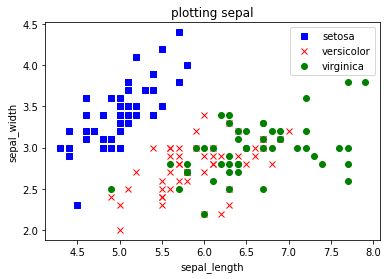

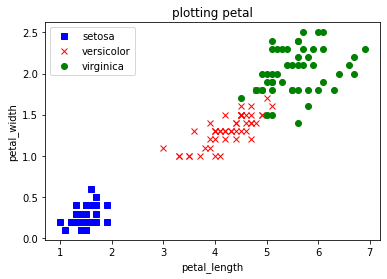

In [40]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#load dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

#diviide sepal and petal matrix
x_sepal_length = x[:, [0]]
x_sepal_width = x[:, [1]]
x_petal_length = x[:, [2]]
x_petal_width = x[:, [3]]

#plotting sepal
plt.plot(x_sepal_length[:50], x_sepal_width[:50], 's', color='blue', label='setosa')
plt.plot(x_sepal_length[50:100], x_sepal_width[50:100], 'x', color='red', label='versicolor')
plt.plot(x_sepal_length[100:], x_sepal_width[100:], 'o', color='green', label='virginica')
plt.title('plotting sepal')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

#plotting petal
plt.plot(x_petal_length[:50], x_petal_width[:50], 's', color='blue', label='setosa')
plt.plot(x_petal_length[50:100], x_petal_width[50:100], 'x', color='red', label='versicolor')
plt.plot(x_petal_length[100:], x_petal_width[100:], 'o', color='green', label='virginica')
plt.title('plotting petal')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()


Dalam kode ini, kita me-load semua data irish yang berjumlah 150 data. Untuk data panjang dan lebar petal & sepal disimpan dalam variabel x. Sementara kelas bunga irish disimpan dalam variabel y. Lalu dilakukan parsing untuk setiap data di variabel x yang berturut-turut merepresentasikan panjang sepal, lebar sepal, panjang petal, dan lebar petal. Setelah itu dilakukan plotting berdasarkan data sepal dan petal. Untuk hasil plotting data sepal diperoleh hasil kelas versicolor dan virginica tidak linier separable sehingga sulit untuk ditemukan polanya secara manual oleh manusia. Sementara hasil plotting dengan data petal memberikan perseberan kelas yang lebih baik karena masing-masing kelas mayoritasnya tersebar dalam suatu daerah yang spesifik dan masing-masing daerahnya berbeda. Oleh karena itu, kita menggunakan data fitur petal sebagai dasar klasifikasi baik untuk model pola secara manual maupun dengan algoritma-algoritma machine learning nantinya.



In [41]:
def predict(x_length, x_width):
  if ((-0.5*x_length+1.5)>x_width):
    return 0
  elif (((-2/3)*x_length+5)<x_width):
    return 2
  else:
    return 1

Pada fungsi di atas didefinisikan garis pembatas antar daerah kelas berupa garis lurus. Dalam membuat garis tersebut diperlukan minimal dua titik. Titik-titik tersebut diambil dari hasil pengamatan manusia sehingga terbentuklah dua buah garis sebagai model pengenalan pola yang ditemukan yang berfungsi sebagai pembatas antar daerah kelas.

In [42]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

Kode di atas merupakan sebuah fungsi untuk membuat decision region berdasarkan classifier yang digunakan. Fungsi tersebut akan memplot daerah dengan latar belakang yang memiliki warna berbeda sesuai dengan daerah klasifikasi dari bunga irish.

Misclassified samples: 6
Accuracy: 0.96


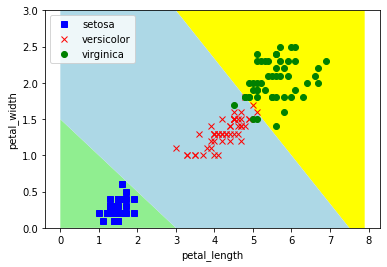

In [123]:
from sklearn.metrics import accuracy_score
n_data = len(y)
y_pred = [0 for i in range(n_data)]

for i in range(n_data):
  y_pred[i] = predict(x_petal_length[i], x_petal_width[i])

y_miss = (y != y_pred).sum()
print('Misclassified samples: %d' % y_miss)
print('Accuracy: %.2f' % accuracy_score(y, y_pred))

x_vals = np.arange(0, 8, 0.1)
plt.ylim(0,3)
plt.fill_between(x_vals, 0, ((-0.5)*x_vals+1.5), facecolor='lightgreen')
plt.fill_between(x_vals, ((-2/3)*x_vals+5), 3, facecolor='yellow')
plt.fill_between(x_vals, ((-0.5)*x_vals+1.5), ((-2/3)*x_vals+5), facecolor='lightblue')

plt.plot(x_petal_length[:50], x_petal_width[:50], 's', color='blue', label='setosa')
plt.plot(x_petal_length[50:100], x_petal_width[50:100], 'x', color='red', label='versicolor')
plt.plot(x_petal_length[100:], x_petal_width[100:], 'o', color='green', label='virginica')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()


Dari pola pengamatan manual yang kita deklarasikan menghasilkan akurasi 96% dengan kesalahan klasifikasi sebanyak 6 dari 150 data. Akurasi ini sedikit menurun dibandingkan ketika kita hanya mengklasifikasikan 2 kelas pada Tugas 1 minggu lalu (akurasi Tugas 1 100%). Dilihat dari decision regionnya, kesalahan terjadi pada kelas versicolor dan virginica. Sementara kelas setosa bisa dikalsifikasikan secara sempurna. Hal tersebut karena kelas setosa linier separable terhadap kedua kelas lainnya sehingga classifier berupa garis lurus yang kita deklarasikan bisa dengan mudah mengklasifikasikan kelas setosa. Sementara untuk kedua kelas lainnnya, classifier garis lurus yang buat tidak bisa memisahkan secara sempurna daerah kedua kelas tersebut karena tingkat separablenya tidak sebagus kelas setosa terhadap kedua kelas lainnya. Alhasil diperoleh beberapa data yang miss dalam pengklasifikasian menggunakan model ini.

In [37]:
from IPython.display import Image
%matplotlib inline
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [38]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target[:]

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Dari Tugas 1, kita menggunakan 2 dari 4 fitur yag tersedia. Kedua fitur yang kita gunakan tersebut adalah panjang petal dan lebar petal. Untuk banyak kelas kita gunakan semua kelas, yaitu ada 3 kelas dalam data yang tersedia.

In [39]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Kode di atas membagi data menjadi 2 bagian, yaitu data latih (data train) dan data validasi (data test). Data dibagi menjadi kedua bagian tersebut dengan proporsi 7:3 dengan 7 bagian untuk data latih dan 3 bagian untuk data test

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Kode di atas merupakan proses normalisasi dari setiap data agar perbedaan antar data tidak terlalu besar. Normalisasi dengan fungsi StandarScaler ini didasarkan pada nilai rata-rata dan standar deviasi dari data.

**ALGORITMA PERCEPTRON**

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Kode di atas digunakan untuk melatiih model machine learning dengan cara mencari bobot-bobot yang sesuai sehingga outputnya sesuai dengan yang diharapkan. max_iter menunjukkan jumlah epochs maksimal yang digunakan, sementara eta0 merepresentasikan learning rate yang diperoleh dari hasil percobaan untuk menemukan learning rate yang paling efektif. random_state digunakan untuk mengacak data sehingga data yang dilatih tidak terurut seperti saat kita menge-load data irish di awal program.

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 5


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.89


Model machine learning dengan perceptron menghasilkan akurasi 89% dengan kesalahan klasifikasi sebanyak 5 dari 45 data. Akurasi tersebut dihitung dari hasil klasifikasi data test (data validasi). Hal tersebut menjawab penurunan akurasi dibandingkan dengan model hasil pengamatan manual manusia yang sebesar 96%. Pada model hasil pengamatan manual, akurasi diperoleh dari perbandingannya dengan data keseluruhan, sementara model machine learning berdasarkan perbandingannya dengan data test. Akuarsi 89% diperoleh setelah melakukan percobaan untuk mencari banyak epochs dan learning rate yang paling optimal. Pengoptimalan tersebut tidak hanya dilihat dari akurasi yang dihasilkan saja, melainkan juga dari kecepatan pelatihan data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

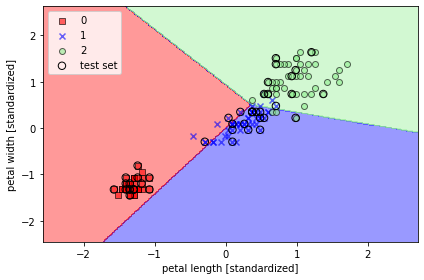

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

Dari hasil decision region di atas, kelas setosa (warna merah) bisa diklasifikasikan secara sempurna oleh model perceptron. Namun, untuk kedua kelas lainnya masih terjadi overlap ke region yang bukan miliknya. Jika titik triple (titik pertemuan ketiga pembatas) bisa digeser lebih ke kiri, maka akan diperoleh hasil yang lebih bagus. Namun, setelah dilakukan pengotimalan parameter, hal tersebut tidak bisa dilakukan. Mungkin karena keterbatasan algoritma perceptron dan kasus data yang tidak sepenuhnya cocok untuk algoritma ini mengingat data yang digunakan tidak linierly separable secara sempurna.



**ALGORITMA LOGISTIC REGGRESSION**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

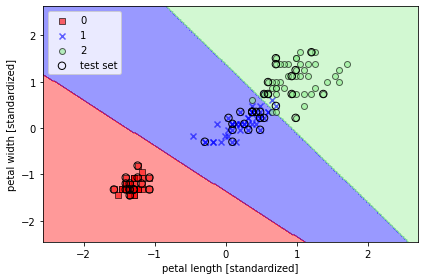

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [ ]:
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


Algoritma logistic regression memberikan akurasi yang cukup tinggi, yaitu 98%, dihitung dari banyaknya klasifikasi benar di data test. Algoritma ini memanfaatkan perhitungan matematika menggunakan logaritma dan menghasilkan activation berupa sigmoid. Activation tersebut membuat pencarian bobot-bobot dalam data latih menjadi lebih akurat. Selain itu, dari hasil decision regionnya juga dihasilkan klasifikasi yang cukup baik dengan hanya beberapa data yang mengalami misklasifikasi akibat data tidak linierly separable secara sempurna.

**ALGORITMA SVM**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

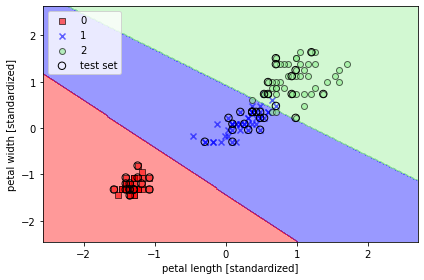

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

In [ ]:
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


Algoritma SVM (Support Vector Machine) ini merupakan pengembangan dari algoritma perceptron. Dalam algoritma ini yang dioptimalkan adalah margin yang semaksimal mungkin. Margin disini diartikan sebagai jarak antara decision boundary (hyperplane pemisah) yang memisahkan dua region dan sampel data latih terdekat dari hyperplane. Algoritma ini mengatasi data yang tidak linierly separable sempurna, lebih baik daripada perceptron. Dibuktikan dengan akurasi 98% dan misklasifikasi 1 dari 45 data test. Hasil ini sama dengan hasil algoritma logistic regression sebelumnya. Tidak heran karena decision region yang dibentuk oleh kedua algoritma tersebut kurang lebih mirip.

**ALGORITMA SVM DENGAN GAMMA**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

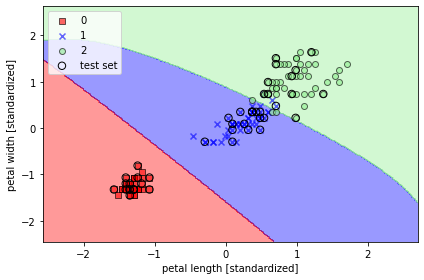

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()

In [ ]:
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
Accuracy: 0.98


Perbedaan algoritma ini dengan SVM yang sebelumnya adalah pada algoritma ini terdapat parameter gamma. Parameter gamma merupakan parameter cut off pada daerah gaussian. Semakin tinggi nilai gamma, maka akan meningkat juga pengaruh dari data latih, yang membuat daerah region umumnya menjadi lebih mulus. Namun, jika terlalu besar akan menyebabkan overfitting. Hasil yang diperoleh pada algoritma ini adalah 98% dengan misklasifikasi 1 dari 45 data test. Hasil ini terlihat tidak berbeda dengan SVM sebelumnya. Namun, jika dilihat dari decision regionnya, dengan penambahan parameter gamma ini membuat daerah klasifikasi lebih *smooth*. Selain itu, Penambahan parameter tersebut juga akan baik digunakan untuk mengolah data-data lainnya yang tidak linierly separable secara sempurna.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

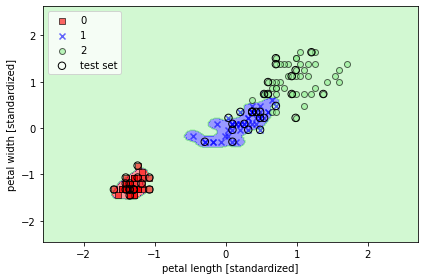

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_2.png', dpi=300)
plt.show()

In [ ]:
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 9
Accuracy: 0.80


Bisa dilihat bahwa jika nilai gamma dinaikkan menjadi sangat besar, maka akurasinya akan menurun. Hal tersebut karena pengaruh dari data latih yang sangat besar pula atau dengan kata lain terjadi overfiting. Model hanya cocok untuk data latih yang saat itu dilatih saja dan kurang bisa digunakan untuk data lainnya. Oleh karena itu, banyak terjadi misklasifikasi pada data test akibat decision regionnya terlalu fit dengan data latih saja.

**ALGORITMA DECISION TREE**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

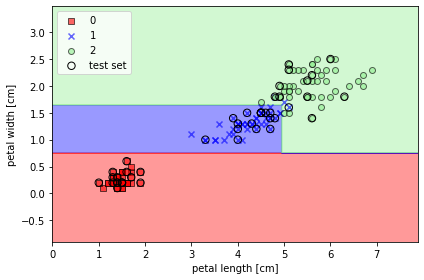

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

In [ ]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
Accuracy: 0.98


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

In [ ]:
import pydotplus

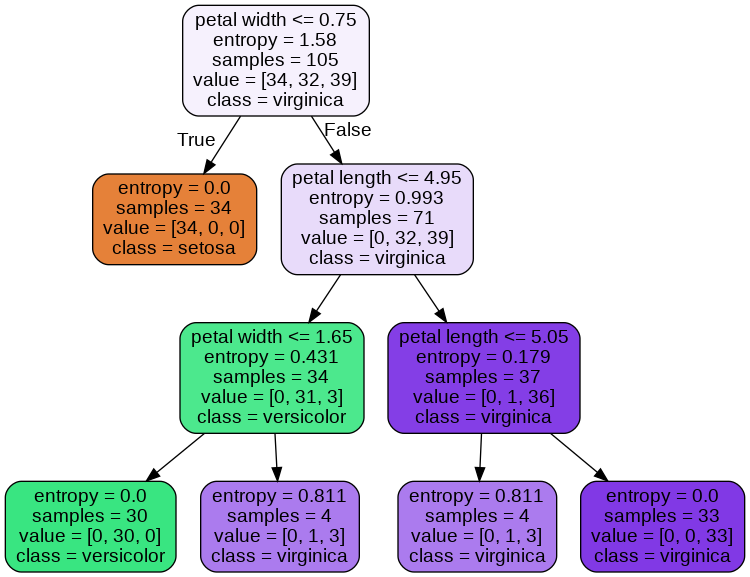

In [ ]:
from IPython.display import Image
from IPython.display import display

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        tree, 
        out_file=None,
        # the parameters below are new in sklearn 0.18
        feature_names=['petal length', 'petal width'],  
        class_names=['setosa', 'versicolor', 'virginica'],  
        filled=True,
        rounded=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

Algoritma ini melakukan breakdown terhadap data yang dilatih untuk menentukan suatu keputusan sehingga diperoleh suatu aturan (rule) berdasarkan keputusan-keputusan tersebut. Decision tree mendeklarasikan nilai cut off untuk mmenentukan keputusan-keputusan tersebut dan algoritma tersebut akan mencari nilai cut off yang paling optimal dan cocok untuk data yang dilatih. Nilai cut off tersebut dijadikan sebagai pembatas untuk mengelompokkan data menjadi dua bagian dan akan terus berlanjut pengelompokan tersebut hingga keputusan yang diambil sudah paling optimal. Algoritma ini cocok digunakan untuk data-data numerik seperti data irish ini. akurasi yang didapatkan pun juga cukup tinggi, yaitu 98%, sama dengan algoritma-algoritma sebelumnya. Decision region yang dihasilkan algoritma ini juga tampak unik, dibatasi oleh garis-garis horizontal dan vertikal sebagai nilai-nilai cut off-nya.

**ALGORITMA RANDOM FOREST**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

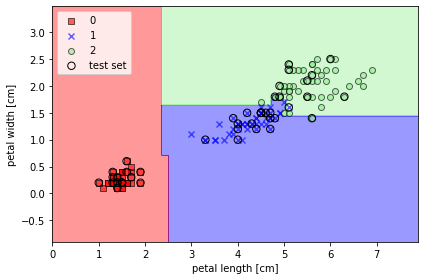

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

In [ ]:
y_pred = forest.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy: 0.96


Algoritma Random Forest memanfaatkan algoritma sebelumnya, yaitu decision tree. Bedanya, dalam algoritma ini ada lebih dari satu decision tree. Keputusan diambil dari voting decision tree dengan suara terbanyak. Hal tersebut tentunya meminimalisir kasalahan penentuan cut off pada decision tree. Umumnya, algoritma ini akan menghasilkan akurasi yang tinggi pada berbagai macam jenis data. Pada kasus ini, diperoleh akurasi 96 %. Akurasi yang tinggi tersebut didapatkan hanya dengan 10 decision tree. Decision region yang diperoleh gabungan tree dalam random forest.

**ALGORITMA K-NEAREST NEIGHBOR (KNN)**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

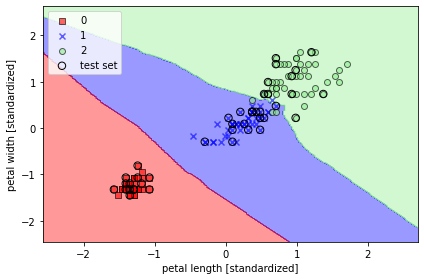

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()

In [ ]:
y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 0
Accuracy: 1.00


Algoritma ini berbeda dari algoritma-algoritma sebelumnya. Algoritma KNN tidak menggunakan bobot-bobot yang diperoleh dari proses pelatihan data latih, melainkan menggunakan pendekatan memory-based. Algoritma akan meng-assign hasil prediksi sesuai dengan kelas data terbanyak pada jarak k (di-state oleh pengguna). Tentunya algoritma ini sangat cocok untuk data-data yang linierly separable, seperti data irish ini. Hasilnya pun diperoleh akurasi 100% karena data irish cukup linierly separable.

Dari pendekatan-pendekatan dengan berbagai algoritma, diperoleh beberapa kesimpulan.
*   Algoritma perceptron memiliki akurasi terendah dan algoritma KNN memiliki akurasi tertinggi dalam klasifikasi kelas bunga irish.
*   Semua algoritma, kecuali perceptron, memiliki akurasi yang lebih tinggi jika dibandingkan dengan model pengenalan pola secara manual (seperti pada tugas 1).
*   Semakin linerly separable suatu data, semakin tinggi akurasi yang bisa didapatkan
*   Setiap algoritma memiliki kelebihan dan kekurangan masing-masing, tergantung pada data yang diolah.
*   Algoritma logistic regression menghasilkan pengklasifikasian yang lebih mulus daripada perceptron, begitu pula dengan decision regionnya
*   Algoritma SVM bisa digunakan untuk data-data yang tidak linierly separable. Dengan penambahan parameter gamma, maka algoritma akan bekerja lebih baik lagi.
*   ALgoritma decision tree sangat cocok untuk data bertipe nummerik, namun decision regionnya relatif tidak terlalu dinamis karena hanya berupa batas garis horizontal dan vertikal
*   Algoritma random forest umumnya cocok digunakan untuk berbagai macam tipe data dan menghasilkan akurasi yang cukup tinggi
*   Algoritma KNN tidak mencari nilai bobot, sangat cocok untuk data yang linierly separable

